<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-71/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Semana 4 - Actividad 1
### Principal Component Analysis (PCA)


* Equipo:
1. Ignacio Antonio Quintero Chávez | A01794419
2. Francisco Xavier Bastidas Moreno | A01794188


* Profesor: Jobish Vallikavungal Devassia.
* Fecha: 11 de Octubre del 2022.

### Parte 1: Ejercicio guiado

El primer paso es importar las librerías que usaremos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn import preprocessing

Después procedemos a importar el data set con el que trabajaremos y hacemos algunas modificaciones.

In [2]:
data = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

# El nombre que queremos ocupar para las columnas las guardamos en una lista llamada "names"
names = ["ID", "amount_credit", "gender", "education", "marital_status", "age", "hist_sep", "hist_aug", "hist_jul", "hist_jun", "hist_may", "hist_apr", "amt_bill_sep", "amt_bill_aug", "amt_bill_jul", "amt_bill_jun", "amt_bill_may", "amt_bill_apr", "paid_amt_sep", "paid_amt_aug", "paid_amt_jul", "paid_amt_jun", "paid_amt_may", "paid_amt_apr", "Y"]

# Eliminamos el index que viene por default en el dataset usando index_col = 0
# Eliminar los encabezados que vienen por default en el dataset usando header = 0. Esto permite que el nombre de nuestras columnas se utilicen como encabezados
dataframe = pd.read_csv(data, names = names, index_col = 0, header = 0)
dataframe

,amount_credit,gender,education,marital_status,age,hist_sep,hist_aug,hist_jul,hist_jun,hist_may,...,amt_bill_jun,amt_bill_may,amt_bill_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Realizamos una copia del data frame como parte de las buenas prácticas.

In [3]:
df = dataframe.copy()
df

,amount_credit,gender,education,marital_status,age,hist_sep,hist_aug,hist_jul,hist_jun,hist_may,...,amt_bill_jun,amt_bill_may,amt_bill_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Obtenemos un resumen de la información de nuestro data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_credit   30000 non-null  int64  
 1   gender          29999 non-null  float64
 2   education       29998 non-null  float64
 3   marital_status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   hist_sep        29997 non-null  float64
 6   hist_aug        29995 non-null  float64
 7   hist_jul        29993 non-null  float64
 8   hist_jun        29991 non-null  float64
 9   hist_may        29984 non-null  float64
 10  hist_apr        29986 non-null  float64
 11  amt_bill_sep    29989 non-null  float64
 12  amt_bill_aug    29989 non-null  float64
 13  amt_bill_jul    29987 non-null  float64
 14  amt_bill_jun    29985 non-null  float64
 15  amt_bill_may    29983 non-null  float64
 16  amt_bill_apr    29990 non-null  float64
 17  paid_amt_sep    29992 non-null 

Notamos que tenemos algunos valores faltantes. Necesitamos eliminar esos valores como parte de nuestra limpieza.

In [5]:
df.dropna(inplace = True)
df

,amount_credit,gender,education,marital_status,age,hist_sep,hist_aug,hist_jul,hist_jun,hist_may,...,amt_bill_jun,amt_bill_may,amt_bill_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Confirmamos si alguna columna todavía tiene valores vacíos.

In [6]:
df.isnull().any()

amount_credit     False
gender            False
education         False
marital_status    False
age               False
hist_sep          False
hist_aug          False
hist_jul          False
hist_jun          False
hist_may          False
hist_apr          False
amt_bill_sep      False
amt_bill_aug      False
amt_bill_jul      False
amt_bill_jun      False
amt_bill_may      False
amt_bill_apr      False
paid_amt_sep      False
paid_amt_aug      False
paid_amt_jul      False
paid_amt_jun      False
paid_amt_may      False
paid_amt_apr      False
Y                 False
dtype: bool

Hacemos una segunda copia del data frame, como parte de buenas prácticas.

In [7]:
df_copy_2 = df.copy()
df_copy_2

,amount_credit,gender,education,marital_status,age,hist_sep,hist_aug,hist_jul,hist_jun,hist_may,...,amt_bill_jun,amt_bill_may,amt_bill_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


En el siguiente paso eliminamos nuestras variables categóricas, debido a que el proceso de PCA solo se puede realizar con variables numéricas.

In [8]:
df_copy_3 = df_copy_2.drop(["gender", "education", "marital_status", "Y"], axis = 1)
df_copy_3

,amount_credit,age,hist_sep,hist_aug,hist_jul,hist_jun,hist_may,hist_apr,amt_bill_sep,amt_bill_aug,amt_bill_jul,amt_bill_jun,amt_bill_may,amt_bill_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr
ID,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


### PCA

In [9]:
# Estandarizamos los datos
pcs = PCA()
pcs.fit(preprocessing.scale(df_copy_3.iloc[:, 0:20].dropna(axis=0)))

PCA()

El siguiente paso nos ayudará a encontrar cuántos componentes son necesarios para llegar a un 90% de la información requerida.

In [10]:
# PCA
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,2.5572,2.0154,1.2282,1.0013,0.9608,0.9425,0.9348,0.8853,0.8560,0.8367,0.7691,0.6359,0.5098,0.5005,0.4346,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.3269,0.2031,0.0754,0.0501,0.0462,0.0444,0.0437,0.0392,0.0366,0.0350,0.0296,0.0202,0.0130,0.0125,0.0094,0.0066,0.0035,0.0020,0.0013,0.0012
Cumulative proportion,0.3269,0.5300,0.6055,0.6556,0.7017,0.7462,0.7898,0.8290,0.8657,0.9007,0.9302,0.9505,0.9635,0.9760,0.9854,0.9920,0.9955,0.9976,0.9988,1.0000


Obtenemos la desviación estándar, la proporción de varianza y la proporción acumulada. Notamos que con 10 componentes se llega a un 90%.

In [11]:
# Se importan otras librerías que ocuparemos
import seaborn as sns
import matplotlib as mpl

# Scree Plot

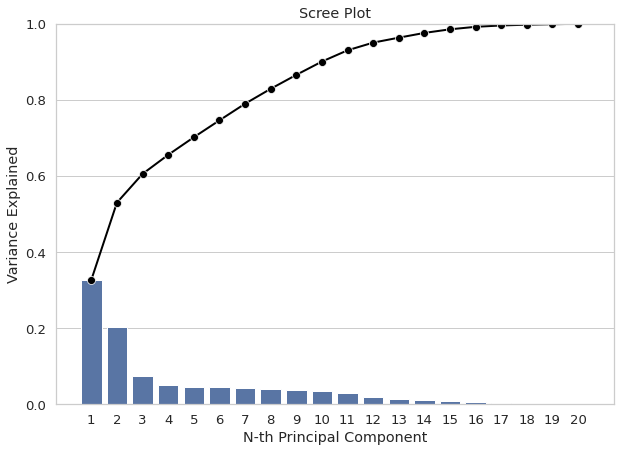

In [12]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

En los siguientes pasos interpretamos el componente principal en términos de las variables originales.

In [13]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_copy_3.iloc[:, 0:20].columns
                                )
pcsComponents_df.iloc[:,:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
amount_credit,0.069780,0.313437,0.051573,-0.194615,-0.135536,-0.011427,-0.063919,0.062766,0.020745,-0.347981
age,0.013010,0.067907,-0.035171,-0.965201,0.131842,0.020011,0.037795,-0.040502,-0.003634,0.083033
hist_sep,0.160361,-0.300810,-0.004077,-0.044294,-0.088403,0.010623,-0.010361,-0.011895,0.035982,0.565489
hist_aug,0.193241,-0.337739,0.044682,-0.045093,-0.107884,0.006519,-0.017485,-0.003078,0.022684,0.343608
hist_jul,0.199463,-0.347033,0.099677,-0.047251,-0.051315,-0.023884,-0.016868,-0.024327,-0.107018,0.067549
hist_jun,0.206331,-0.348043,0.136655,-0.053572,-0.005521,-0.044943,0.018645,-0.044296,-0.001457,-0.237243
hist_may,0.210280,-0.335178,0.155542,-0.043100,0.043093,-0.013095,0.015920,0.085432,0.017791,-0.375640
hist_apr,0.205797,-0.309409,0.153558,-0.034091,0.059376,0.074924,-0.036484,0.032124,0.031555,-0.409516
amt_bill_sep,0.334788,0.139942,-0.224208,0.021391,-0.050854,-0.029990,-0.050424,0.004863,0.008271,0.068142
amt_bill_aug,0.346225,0.140165,-0.193869,0.033234,0.019596,-0.078866,-0.041205,-0.042245,-0.134283,0.057156


In [15]:
print("El componente máximo de PC1 es: " + pcsComponents_df.PC1.idxmax())
print("El componente mínimo de PC1 es: " + pcsComponents_df.PC1.idxmin())

El componente máximo de PC1 es: amt_bill_jun
El componente mínimo de PC1 es: age


In [16]:
print("El componente máximo de PC2 es: " + pcsComponents_df.PC2.idxmax())
print("El componente mínimo de PC2 es: " + pcsComponents_df.PC2.idxmin())

El componente máximo de PC2 es: amount_credit
El componente mínimo de PC2 es: hist_jun


In [17]:
print("El componente máximo de PC3 es: " + pcsComponents_df.PC3.idxmax())
print("El componente mínimo de PC3 es: " + pcsComponents_df.PC3.idxmin())

El componente máximo de PC3 es: paid_amt_aug
El componente mínimo de PC3 es: amt_bill_sep


In [18]:
print("El componente máximo de PC4 es: " + pcsComponents_df.PC4.idxmax())
print("El componente mínimo de PC4 es: " + pcsComponents_df.PC4.idxmin())

El componente máximo de PC4 es: paid_amt_aug
El componente mínimo de PC4 es: age


In [19]:
print("El componente máximo de PC5 es: " + pcsComponents_df.PC5.idxmax())
print("El componente mínimo de PC5 es: " + pcsComponents_df.PC5.idxmin())

El componente máximo de PC5 es: paid_amt_sep
El componente mínimo de PC5 es: paid_amt_may


In [20]:
print("El componente máximo de PC6 es: " + pcsComponents_df.PC6.idxmax())
print("El componente mínimo de PC6 es: " + pcsComponents_df.PC6.idxmin())

El componente máximo de PC6 es: paid_amt_jun
El componente mínimo de PC6 es: paid_amt_apr


In [21]:
print("El componente máximo de PC7 es: " + pcsComponents_df.PC7.idxmax())
print("El componente mínimo de PC7 es: " + pcsComponents_df.PC7.idxmin())

El componente máximo de PC7 es: paid_amt_may
El componente mínimo de PC7 es: paid_amt_apr


In [22]:
print("El componente máximo de PC8 es: " + pcsComponents_df.PC8.idxmax())
print("El componente mínimo de PC8 es: " + pcsComponents_df.PC8.idxmin())

El componente máximo de PC8 es: paid_amt_jul
El componente mínimo de PC8 es: paid_amt_jun


In [23]:
print("El componente máximo de PC9 es: " + pcsComponents_df.PC9.idxmax())
print("El componente mínimo de PC9 es: " + pcsComponents_df.PC9.idxmin())

El componente máximo de PC9 es: paid_amt_aug
El componente mínimo de PC9 es: paid_amt_sep


In [24]:
print("El componente máximo de PC10 es: " + pcsComponents_df.PC10.idxmax())
print("El componente mínimo de PC10 es: " + pcsComponents_df.PC10.idxmin())

El componente máximo de PC10 es: hist_sep
El componente mínimo de PC10 es: hist_apr


### Boxplot - Valores atípicos

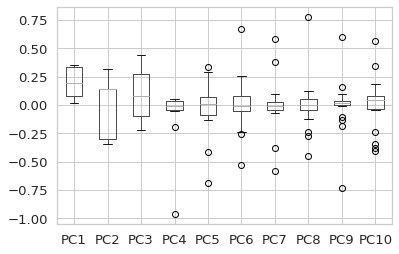

In [14]:
boxplot=pcsComponents_df.iloc[:,:10]
boxplot.boxplot()

Se puede observar que PC1, PC2 y PC3 no tienen valores atípicos. PC4 cuenta con dos valores atípicos. PC9 y PC10 son los componentes con más valores atípicos.

### Parte 2: Preguntas de la actividad

**¿Cuál es el número de componentes mínimo y por qué?**

**¿Cuál es la variación de los datos que representan esos componentes?**

**¿Cuál es la pérdida de información después de realizar PCA?**

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**